### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [40]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
#load data
df = pd.read_excel("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'left')
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [42]:
# info
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [43]:
# check missing values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'left')

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [44]:
# describe
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [45]:
# null percentages
df.isnull().sum() / len(df) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0.002020
TP_TRN,0.002020
KDSUP,72.501667
KAS,8.212730
TRN_DK,0.002020
GDG,0.002020
GGD,0.002020
KDSLS,100.000000
KEL,0.002020
ITEM,0.002020


In [64]:
# Cleaning Data (Selecting relevant columns for apriori and association rules)
cleaned_data = df

selected_columns = ['ITEM', 'NO_BKT', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']
if all(column in cleaned_data.columns for column in selected_columns):
    cleaned_data = cleaned_data[selected_columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
cleaned_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,3
NO_BKT,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3


In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

cleaned_data = pd.DataFrame(imputer.fit_transform(cleaned_data), columns=cleaned_data.columns)

cleaned_data.isnull().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,0
NO_BKT,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0


In [67]:
top_products = df.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:\n", top_products)


Top-Selling Products:
 KEL
MIE        40367.0
SUSU KT    34392.0
SUSU       30108.0
SABUN.M    18827.0
PAMPERS    18538.0
SNACK      16815.0
MINUMAN    16601.0
BISCPAK    14648.0
AIR.M      12717.0
DETERJN    12106.0
Name: QTY, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


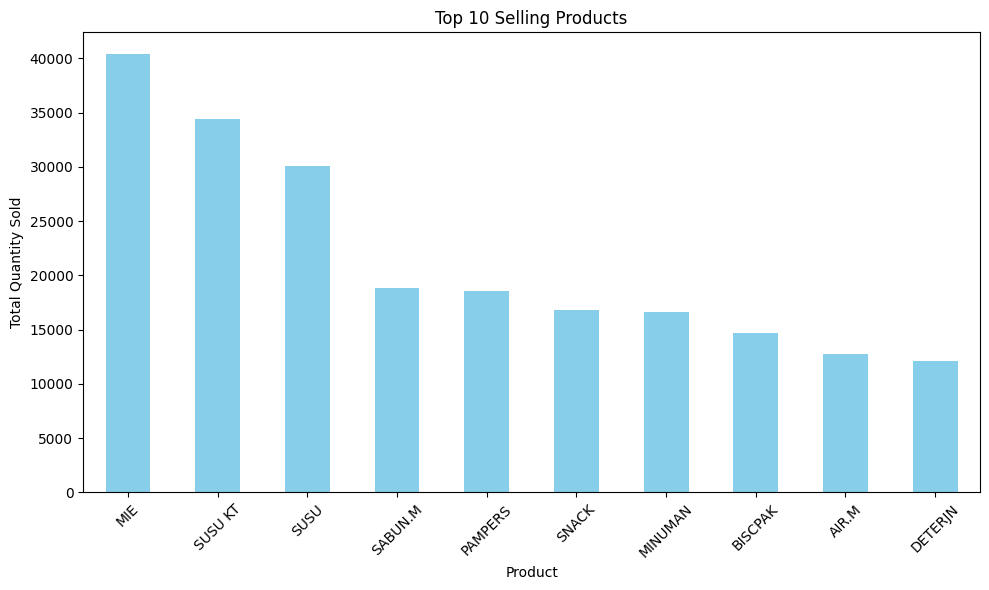

In [68]:
# Visualization: Top Selling Products
top_products = cleaned_data.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


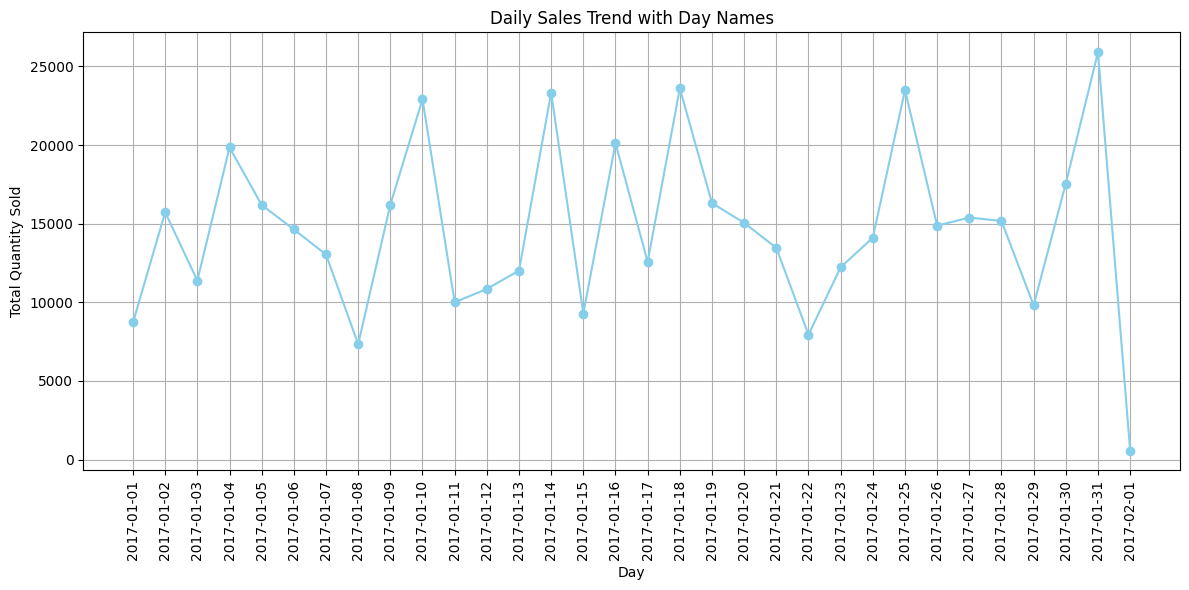

In [69]:
# Visualization: Seasonality Trends for January
cleaned_data['Day'] = cleaned_data['TANGGAL'].dt.date
cleaned_data['DayName'] = cleaned_data['TANGGAL'].dt.day_name()
daily_trend = cleaned_data.groupby(['Day', 'DayName'])['QTY'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Day'].astype(str), daily_trend['QTY'], marker='o', color='skyblue')
plt.title('Daily Sales Trend with Day Names')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


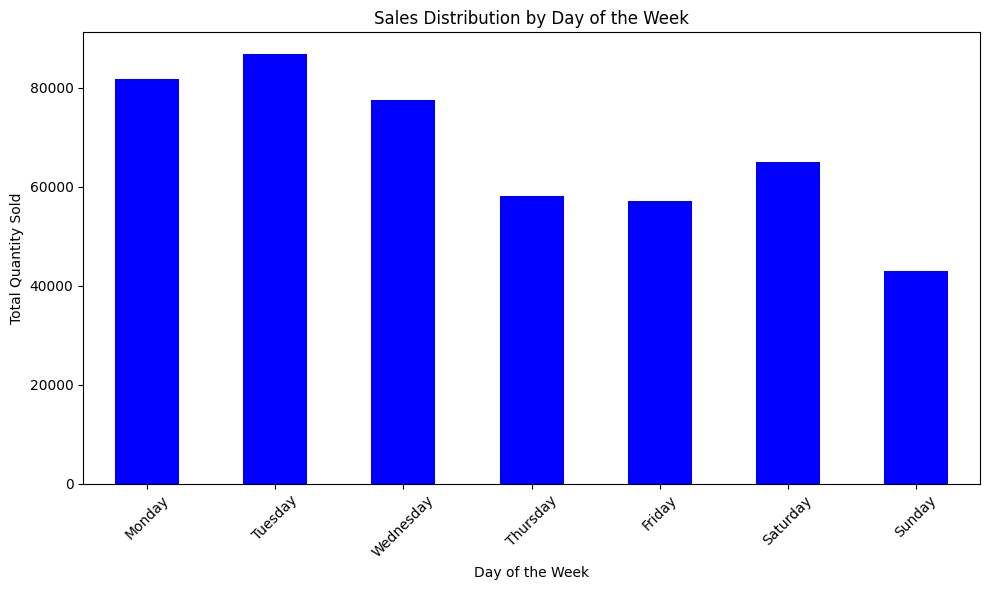

In [70]:
# Visualization: Sales Distribution by Day of the Week (all-time)
weekday_sales = cleaned_data.groupby('DayName')['QTY'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='blue')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-b8ab86a52681>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_counts_by_period = cleaned_data.groupby(['period_day', 'KEL']).size().reset_index(name='count')
<ipython-input-71-b8ab86a52681>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

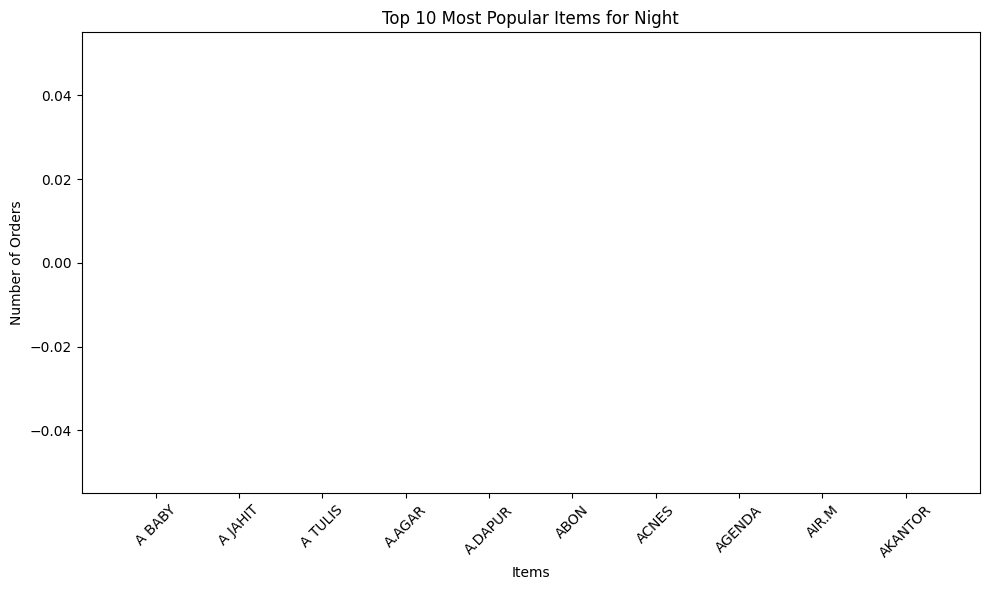

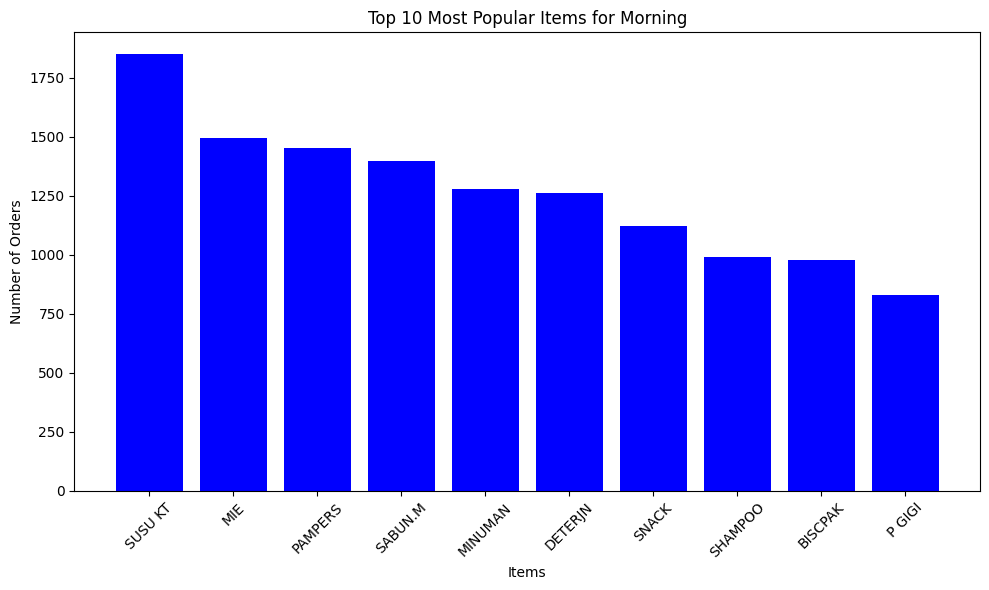

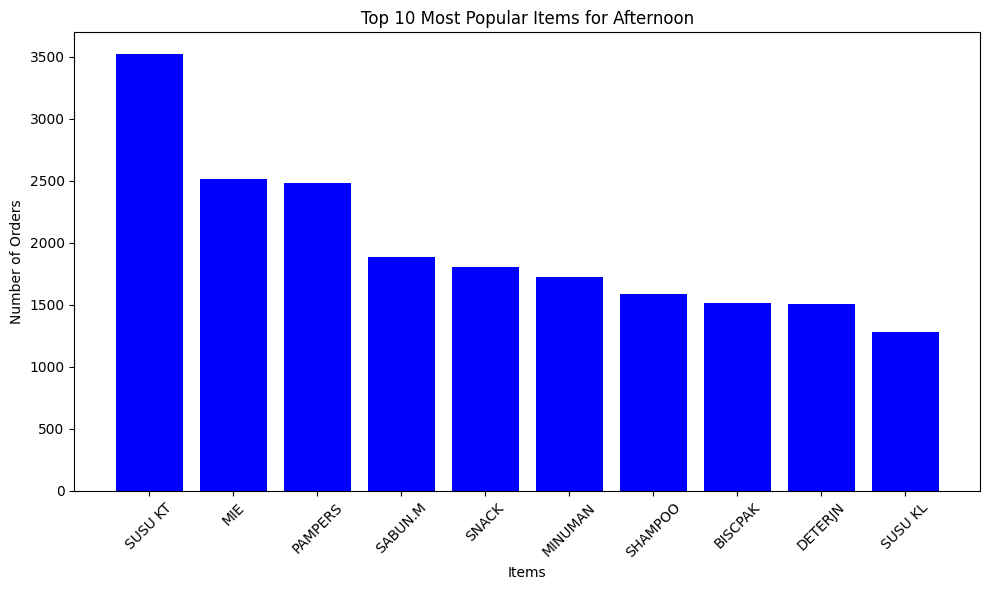

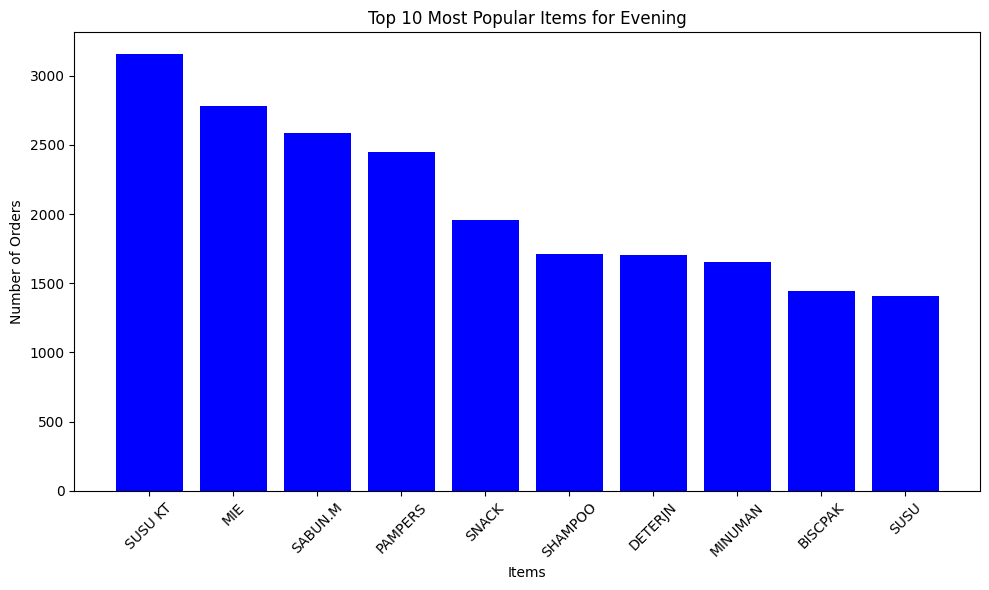

In [71]:
# Visualization for each period of day (Morning to Night)
# Create a period column based on the time of day
cleaned_data['hour'] = pd.to_datetime(cleaned_data['JAM'], format='%H:%M:%S', errors='coerce').dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
cleaned_data['period_day'] = pd.cut(cleaned_data['hour'], bins=bins, labels=labels, right=False)

# Count item occurrences by period
item_counts_by_period = cleaned_data.groupby(['period_day', 'KEL']).size().reset_index(name='count')

# Extract top 10 items for each period
top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Plot top items for each period
periods = top_items_by_period['period_day'].unique()
for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))
    plt.bar(data['KEL'], data['count'], color='blue')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# The chart below shows that the afternoon and evening are peak times, with no sales at night due to the supermarket being closed during those hours.


In [72]:
# Create a crosstab of transactions vs items
apriori_data = pd.crosstab(cleaned_data['NO_BKT'], cleaned_data['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

In [73]:
# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-7e98910f9cad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

In [74]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [75]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
6,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
7,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667



Strategic Store Layout Recommendations for Enhanced Cross-Selling and Impulse Purchases :

Position Complementary Products Together:

- Shampoo (SHAMPOO) and Soap (SABUN.M):
With a high lift value of 5.46, these items show a strong link. Place them near each other in the personal care aisle or in a designated section to encourage easy pairing.

- Detergent (DETERJN) and Fabric Softener (SOFTENR):
A lift value of 7.7 indicates these products are often bought together. Position detergent and softeners next to each other in the laundry care aisle to facilitate cross-selling.

- Biscuits (BISCPAK) and Snacks (SNACK):
With a lift value of 5.0, there is a notable association between these products. Place them together in the snack section, and consider placing them near the checkout counters to drive impulse purchases.

Optimal Placement for High-Interest Items:

- Milk Powder (SUSU KT) and Detergent (DETERJN):
A moderate lift value of 1.72 suggests a mild association between these items. Position milk powder at the end of the detergent aisle to catch customers' attention and encourage cross-purchase.
Bundling Opportunities:

- Toothpaste (P GIGI) and Shampoo (SHAMPOO):
These daily essentials are strongly associated with a lift value of 6.03. Introduce promotional bundles, like "Buy Shampoo and Get Toothpaste at a Discount", to increase both sales and convenience.
Targeted Cross-Selling Displays:

- Baby Diapers (PAMPERS) and Baby Care Products (e.g., SABUN.M, SHAMPOO):
Set up a baby care section that features related products and highlights special deals, making it easy for parents to buy all the essentials in one place.

Strategic Placement for Impulse Purchases:

- Biscuits (BISCPAK) and Snacks (SNACK):
These products show a strong association with a lift of 5.01, indicating customers often buy them together. Display them near the checkout area to encourage last-minute impulse buys.